# Al

In [7]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-19);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")

In [8]:
% define equilibrium problem

AlT=1e-2;  pH=2:1:12; pe=20.75-pH; T=25; show=0;


In [9]:
% MODEL USING PHREEQC

minerals=[{'Gibbsite'}]; totalvector=[AlT; 3*AlT]; totalnames=[{'Al'}; {'Cl'}]; 
speciesexport=[{'Al+3'}; {'OH-'};{'AlOH+2'};{'Al(OH)2+'};{'Al2(OH)2+4'};{'Al3(OH)4+5'};{'Al13O4(OH)24+7'}];
acid=['HCl']; 
database=['Al_species_noAl13.dat']; 


for i=1:length(pH)

[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=...
runPHREEQCv2noHA(T,pH(i),pe(i),totalnames,totalvector,minerals,speciesexport,database,show,acid);


Alno13(i)=solutionspeciesconcs(1); 
OH(i)=solutionspeciesconcs(2); 
AlOH(i)=solutionspeciesconcs(3); 
AlOH2(i)=solutionspeciesconcs(4); 
Al2OH2(i)=solutionspeciesconcs(5); 
Al3OH4(i)=solutionspeciesconcs(6);
Al13(i)=solutionspeciesconcs(7);
AlOH3sno13(i)=solidconcs(1);

end


In [10]:
% MODEL USING PHREEQC

minerals=[{'Gibbsite'}]; totalvector=[AlT; 3*AlT]; totalnames=[{'Al'}; {'Cl'}]; 
speciesexport=[{'Al+3'}; {'OH-'};{'AlOH+2'};{'Al(OH)2+'};{'Al2(OH)2+4'};{'Al3(OH)4+5'};{'Al13O4(OH)24+7'}];
acid=['HCl']; 
database=['Al_species.dat']; 


for i=1:length(pH)

[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=...
runPHREEQCv2noHA(T,pH(i),pe(i),totalnames,totalvector,minerals,speciesexport,database,show,acid);


Alw13(i)=solutionspeciesconcs(1); 
OH(i)=solutionspeciesconcs(2); 
AlOH(i)=solutionspeciesconcs(3); 
AlOH2(i)=solutionspeciesconcs(4); 
Al2OH2(i)=solutionspeciesconcs(5); 
Al3OH4(i)=solutionspeciesconcs(6);
Al13(i)=solutionspeciesconcs(7);
AlOH3sw13(i)=solidconcs(1);

end


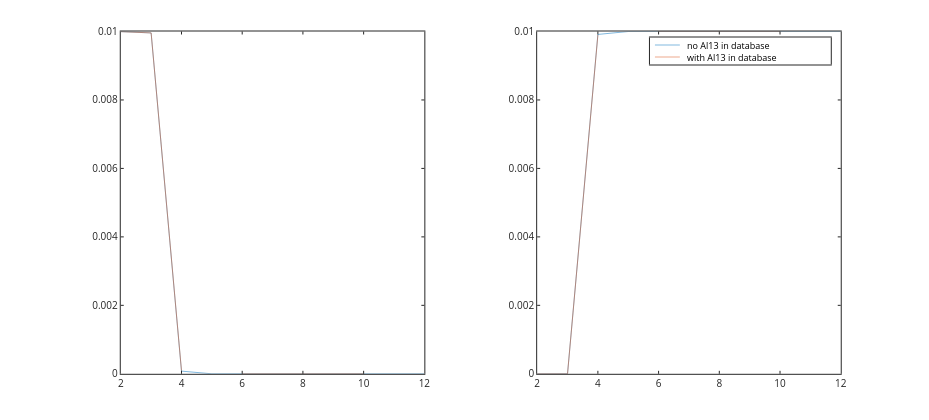

In [11]:
subplot(121); plot(pH,Alno13); hold on; plot(pH,Alw13)
subplot(122); plot(pH,AlOH3sno13); hold on; plot(pH,AlOH3sw13)
legend('no Al13 in database','with Al13 in database')

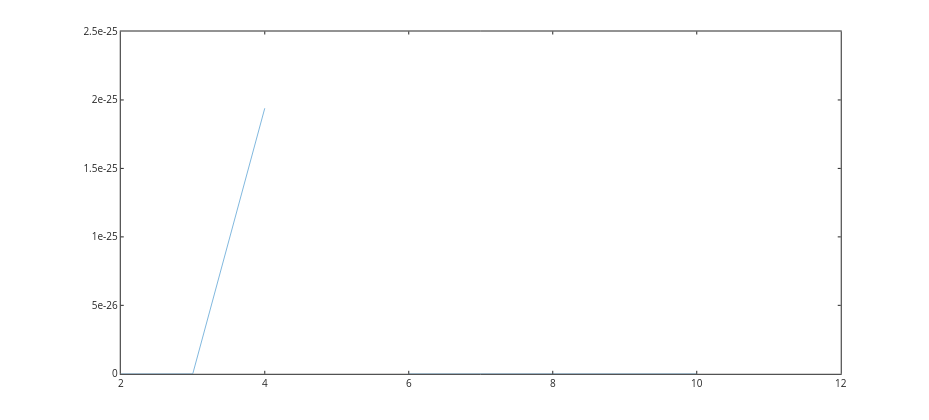

ERROR: received unknown message
Message type: usage_request


In [12]:
plot(pH,Al13)